In [1]:
import masw
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
from scipy.optimize import dual_annealing

filename    = 'SampleData.dat'
HeaderLines = 7
fs          = 1000 # Hz
N           = 24
x1          = 10   # m
dx          = 1    # m
direction   = 'forward';
Amasw       = masw.masw(filename, 1/fs, fs, N, dx, x1, direction, header=6 )

f_curve0 = np.array([ 8.33333333,  9.16666667, 10.,         10.83333333, 11.66666667, 12.5,
 13.33333333, 14.16666667, 15.,         15.83333333, 16.66666667, 17.5,
 18.33333333, 19.16666667, 20.,         20.83333333, 21.66666667, 22.5,
 23.33333333, 24.16666667, 25.,         25.83333333, 26.66666667, 27.5,
 28.33333333, 29.16666667, 30.,         30.83333333, 31.66666667, 32.5,
 33.33333333, 34.16666667, 35.,         35.83333333, 36.66666667, 37.5,
 38.33333333, 39.16666667, 40.,         40.83333333])

lambda_curve0 = np.array([28.44, 25.30909091, 22, 18.92307692, 17.05714286, 14.96, 13.2, 11.50588235, 10.06666667, 8.52631579, 7.5, 6.74285714, 6.27272727,
                      5.68695652, 5.2, 4.848, 4.52307692, 4.13333333, 3.9, 3.72413793, 3.52, 3.36774194, 3.225, 3.09090909, 2.96470588, 2.84571429,
                      2.73333333, 2.62702703, 2.49473684, 2.4, 2.31, 2.25365854, 2.2, 2.12093023, 2.07272727, 2, 1.93043478, 1.86382979, 1.825, 1.7877551])
c_curve0 = np.array([237, 232, 220, 205, 199, 187, 176, 163, 151, 135, 125, 118, 115, 109, 104, 101, 98, 93, 91, 90, 88, 87, 86, 85, 84, 83, 82, 81, 79,
                 78, 77, 77, 77, 76, 76, 75, 74, 73, 73, 73])
c_test_min = 50 #m/s
c_test_max = 500 #m/+s
delta_c_test = 0.5 #m/s
c_test = np.arange(c_test_min, c_test_max + 1, delta_c_test) #m/s
c_test = c_test[:-1]


In [ ]:
#print(np.array(tuple(c_test)))

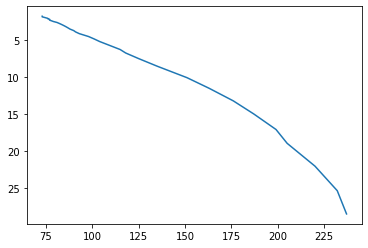

In [2]:
plt.plot(c_curve0, lambda_curve0)
plt.gca().invert_yaxis()

In [25]:
n = 6
alpha = [1440, 1440, 1440, 1440, 1440, 1440, 1440] #m/s
h = np.array([1, 1, 2, 2, 4, 5]) #m
beta = np.array([75, 90, 150, 180, 240, 290, 290]) #m/s
parameters = np.concatenate((h,beta))
rho = np.array([1850, 1850, 1850, 1850, 1850, 1850, 1850]) #kg/m^3
c_t, lambda_t = Amasw.theoretical_dispersion_curve(c_test, h, alpha, beta, rho, n, lambda_curve0)
#c_tX, lambda_tX = Amasw.inversion_func

In [26]:
def objetive(parameters):
    h = parameters[0:n]
    beta = parameters[n:]
    #beta = parameters
    #alpha = np.sqrt(3)*beta
    alpha = [1440, 1440, 1440, 1440, 1440, 1440, 1440]
    #rho = (alpha + 1870)/3.05
    rho = np.array([1850, 1850, 1850, 1850, 1850, 1850, 1850])
    c_t, lambda_t = Amasw.theoretical_dispersion_curve(c_test, h, alpha, beta, rho, n, lambda_curve0)
    observados = c_curve0
    teoricos = np.squeeze(c_t)
    return np.sqrt(np.sum((teoricos-observados)**2/len(teoricos)))
    

In [27]:
error=objetive(parameters)

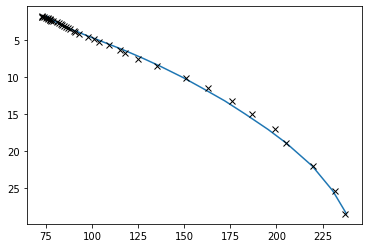

In [28]:
plt.plot(c_t, lambda_t)
plt.plot(c_curve0, lambda_curve0,'kx')
plt.gca().invert_yaxis()

In [41]:
lw = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 50, 50, 50, 50, 50, 50, 50]
up = [10, 10, 10, 10, 10, 10, 300, 300, 300, 300, 300, 300, 300]
ret = dual_annealing(objetive, bounds=list(zip(lw, up)),maxfun=10000)
print(ret)

KeyboardInterrupt: 

In [40]:
print(ret.x[0:n])
print(ret.x[n:])

[9.76545466 5.47543195 2.2285916  0.63131009 2.78437608 2.90747453]
[279.59453486 274.43446342 109.1422463  161.98033351  65.52786252
 260.12293928 234.77257047]


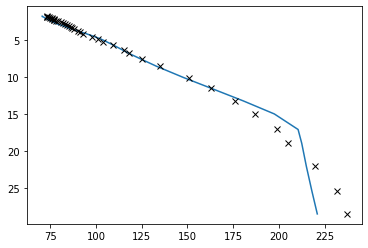

In [39]:
h_sol = ret.x[0:n]
beta_sol = ret.x[n:]
c_sol, lambda_sol = Amasw.theoretical_dispersion_curve(c_test, h_sol, alpha, beta_sol, rho, n, lambda_curve0)
plt.plot(c_sol, lambda_sol)
plt.plot(c_curve0, lambda_curve0,'kx')
plt.gca().invert_yaxis()